# Script for studying the use of graphs in python:

In [1]:
import numpy as np
from random import uniform,randint
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import networkx as nx
from time import sleep
import pandas as pd

In [2]:
from modules.distances import l1dist, l2dist, distgraph,distgraphl1,distgraphmaha
from modules.graphs import getgraph

In [6]:
## Sorting point masses into the 2D space:
xmin = -10.0
xmax = +10.0
ymin = -10.0
ymax = +10.0
npoints = 15
x = np.zeros(npoints)
y = np.zeros(npoints)
node = np.zeros(npoints)

In [7]:
for i in range(npoints):
    node[i] = int(i)
    x[i] = uniform(xmin,xmax)
    y[i] = uniform(ymin,ymax)

L2= 28.2161031817 3.58449974946
L1= 16.7751817173 3.58449974946
Maha= 5.48475527392 3.58449974946


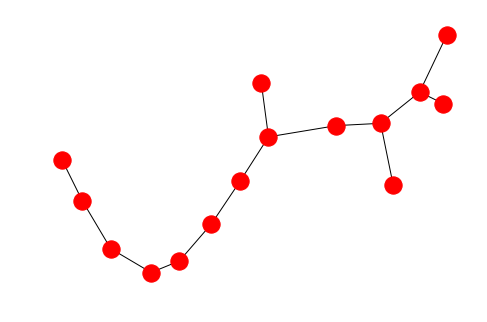

In [8]:
#Test for checking the functionality of the getgraph function
M = np.array((x,y))
G,TSG = getgraph(M)
nx.draw(TSG)

#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi1, dmst1 = distgraph(M)
print('L2=', phi1, dmst1)

phi2, dmst2 = distgraphl1(M)
print('L1=',phi2, dmst2)

phi3, dmst3 = distgraphmaha(M)
print('Maha=', phi3, dmst3)

In [ ]:
#TEST FOR MAHALANOBIS DISTANCE
M = np.array( (x,y) )
C = np.cov( M.T )
IC = np.eye(20)
invC = np.linalg.inv(C)

In [ ]:
#TEST FOR MAHALANOBIS DISTANCE
mahalanobis(x,y,invC)

In [ ]:
###--------##########################
plt.figure( figsize=(10,10), facecolor='w' )
p1 = plt.plot(x, y, 'or' , markersize=12 )

plt.title('Bolinhas')
plt.grid()

plt.xlim( min(x)-1.0, max(x)+1.0 )
plt.ylim( min(y)-1.0, max(y)+1.0 )

plt.gca().invert_yaxis()
plt.savefig('test_graph.png',dpi=300,transparent=True)
plt.show()

In [ ]:
pos={'x':x, 'y':y}
type(pos)

In [ ]:
# Lets see what's going on here:
S = nx.Graph()
for i in range(npoints):
    S.add_node(i ,pos=(x[i],y[i]))
    for j in range(npoints):
        M1 = np.array((x[i],y[j]) )
        C1 = np.cov(M1.T)
        C1 = np.zeros((1,1))
        invC1 = np.zeros((1,1))
        S.add_edge(i,j,weight=l2dist(x,y)[i][j])
#nx.set_node_attributes(S, 'X_Y', pos)
TS = nx.minimum_spanning_tree(S)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(S)
plt.subplot(122)
nx.draw(TS)
plt.show()

In [ ]:
#TENTANDO COLOCAR LABELS NOS VERTICES
nx.draw(TS, with_labels = True)
plt.savefig('labels.png')

# TODO: Entender as saidas do MST para podermos calcular a funcao de equidistancia para calcular a funcao $\theta$

># <center> $\theta = \sum_i (d_{mst}^i - \overline{d_{mst}})^2$

In [ ]:
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi1, dmst1 = distgraph(M)
print('L2=', phi1, dmst1)

phi2, dmst2 = distgraphl1(M)
print('L1=',phi2, dmst2)

#phi3, dmst3 = distgraphmaha(x,y)
#print('Maha=', phi3, dmst3)

In [ ]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
u = []
v = []
for (i, j, d) in TS.edges.data('weight'):
    print(i,j,d)
    u.append(x[i])
    v.append(y[j])
    xt = [ x[i], x[j] ]
    yt = [ y[i], y[j] ]
    plt.annotate( int(node[i]), xy=(x[i],y[i]) , bbox=bbox_props)
    plt.annotate( int(node[j]), xy=(x[j],y[j]) , bbox=bbox_props)
    plt.plot(xt,yt,'.-')
plt.grid()
p1 = plt.plot(x, y, 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()

In [ ]:
distgraphmaha(x,y)

# TODO: Fazer testes simples para verificar a função distGraf:
> 1) um circulo de pontos igualmente espaçados e aleatorios; <br>
> 2) um retangulo de pontos igualmente espaçados e aleatórios; <br>
> 3) plotar a àrvore com os índices dos vértices para identificação;<br>

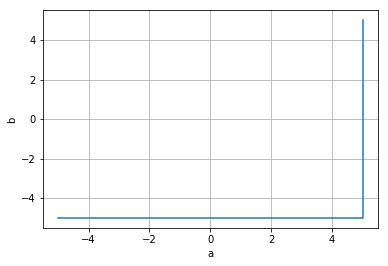

In [10]:
#PLOTA UM L PARA TESTAR A FUNCAO DISTGRAPH E O NETWORKX
ax = np.linspace(-5,5,npoints)
ay = np.zeros(npoints-1)
ay = 5 + ay
by = np.linspace(-5 + 2*5/(npoints-1),5,npoints-1)
bx = np.zeros(npoints)
bx = -5 + bx

a = np.zeros(2*npoints - 1)
b = np.zeros(2*npoints - 1)

for i in range(0, npoints):
    a[i] = ax[i]
for i in range(npoints, 2*npoints - 1 ):
    a[i] = ay[i - npoints]

for i in range(0, npoints):
    b[i] = bx[i]
for i in range(npoints, 2*npoints - 1):
    b[i] = by[i - npoints]
L = (a,b)
plt.plot(a,b)
plt.xlabel('a')
plt.ylabel('b')
plt.grid()
plt.show()

In [11]:
Sl = nx.Graph()
for i in range(2*npoints-1):
    Sl.add_node(i ,pos=(L[0][i],L[1][i]))
    for j in range(2*npoints-1):
        Sl.add_edge(i,j,weight=l2dist(a,b)[i][j])
TSl = nx.minimum_spanning_tree(Sl)

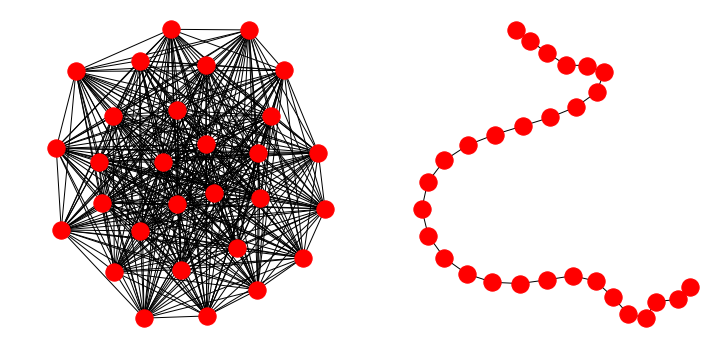

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(Sl)
plt.subplot(122)
nx.draw(TSl)
plt.show()

In [13]:
#Calculating the phi funtcion and the mean
phi1, dmst1 = distgraph(L)
print(f'Phi = {phi1:.3f}; media = {dmst1:.3f}') #this makes sense since the average is close enough to every point

Phi = 0.000; media = 0.714


In [14]:
distgraphmaha(L)

LinAlgError: Singular matrix

In [ ]:
node1 = np.zeros(2*npoints-1)
for i in range(2*npoints-1):
    node1[i] = int(i)

In [ ]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10) )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
for (i, j, d) in TSl.edges.data('weight'): 
    at = [ a[i], a[j] ]
    bt = [ b[i], b[j] ]
    plt.annotate( int(node1[i]), xy=(a[i],b[i]) , bbox=bbox_props)
    plt.annotate( int(node1[j]), xy=(a[j],b[j]) , bbox=bbox_props)
    plt.plot(at,bt,'.-')
plt.grid()
p1 = plt.plot(a,b, 'ko', marker='o' )
#plt.savefig('L2dist.pdf')
#plt.gca().invert_yaxis()
plt.show()

In [ ]:
i = 1j
r = 4.0
theta = np.linspace(0,2*np.pi,50,endpoint=False)
circle = r*np.exp(i*theta)
node = np.arange(0,51)
plt.plot(circle.real,circle.imag)
plt.grid()
plt.show()
C = (circle.real,circle.imag)

In [ ]:
Sc = nx.Graph()
for i in range(50):
    for j in range(i,50):
        Sc.add_edge(i,j,weight=l2dist(circle.real,circle.imag)[i][j])
TSc = nx.minimum_spanning_tree(Sc)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(Sc)
plt.subplot(122)
nx.draw(TSc)
plt.show()

In [ ]:
#Calculating the phi funtcion and the mean
phic, dmstc = distgraph(C)
print(f'{phic:.2f}, {dmstc:.2f}')

In [ ]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
c = 0
for (i, j, d) in TSc.edges.data('weight'):
    xct = [ circle.real[i], circle.real[j] ]
    yct = [ circle.imag[i], circle.imag[j] ]
    plt.annotate( int(node[i]), xy=(circle.real[i],circle.imag[i]) , bbox=bbox_props)
    plt.annotate( int(node[j]), xy=(circle.real[j],circle.imag[j]) , bbox=bbox_props)
    plt.plot(xct,yct,'.-')
plt.grid()
p1 = plt.plot(circle.real, circle.imag, 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()

In [ ]:
## Sorting point masses into the 2D space:
npoints = 10
yl = np.zeros(npoints)
xl = np.linspace(0,10,npoints,endpoint=True)
R = (xl,yl)

In [ ]:
node2 = np.zeros(npoints)
for i in range(npoints):
    node2[i] = int(i)

In [ ]:
###--------##########################
plt.figure( figsize=(10,10), facecolor='w' )
#plt.plot(x1, y1, 'or' , markersize=12 )
#plt.plot(x2, y2, 'ob' , markersize=12 )
plt.plot(xl,yl)
plt.title('Bolinhas')
plt.grid()

#plt.xlim( min(x1)-1.0, max(x1)+1.0 )
#plt.ylim( min(y1)-1.0, max(y1)+1.0 )

plt.gca().invert_yaxis()
#plt.savefig('test_graph.png',dpi=300,transparent=True)
plt.show()

In [ ]:
Sl = nx.Graph()
for i in range(npoints):
    for j in range(npoints):
        Sl.add_edge(i,j,weight=l2dist(xl,yl)[i][j])  #WEIGTH IS GIVEN BY THE EUCLIDIAN'S NORM
TSl = nx.minimum_spanning_tree(Sl)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(Sl)
plt.subplot(122)
nx.draw(TSl)
plt.show()

In [ ]:
#Calculating the phi funtcion and the mean
phic, dmstc = distgraph(R)
print(f'{phic:.2f}, {dmstc:.2f}')

In [ ]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
for (i, j, d) in TSl.edges.data('weight'):
    xctl = [ xl[i], xl[j] ]
    yctl = [ yl[i], yl[j] ]
    plt.annotate( int(node2[i]), xy=(xl[i],yl[i]) , bbox=bbox_props)
    plt.annotate( int(node2[j]), xy=(xl[j],yl[j]) , bbox=bbox_props)
    plt.plot(xl,yl,'.-g')
plt.grid()
p1 = plt.plot(xl,yl, 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()